In [1]:
# imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lightmap_funcs import *
%matplotlib inline 
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.tsa.api import SimpleExpSmoothing

## Задание 1

В специальной лотерее игрок выбирает 5 разных чисел из возможных 30. В этот же день случайным образом определяется победная комбинация из 7 разных чисел (из того же набора). Игрок считается победителем в случае, если совпадают любые 4 числа в выбранном им наборе и в победной комбинации. 

Какова вероятность выигрыша?

Игрок выбирает 5 разных чисел из 30: вероятность этой комбинации - $\frac{5}{30}$. Победная комбинация - 7 разных чисел из того же набора 30 чисел, но победой считается только вариант, когда 4 числа из выпавших 7 совпадают с 4 числами из выбранных игроком. Т.е. вероятность выбрать одно из ненужных чисел - $\frac{26}{30}$ (и 7 вариантов размещения). Получается, что вероятность победной комбинации: $\frac{5}{30} \cdot\ (\frac{7\cdot26}{30} \cdot (\frac{1}{30})^4)$

In [2]:
win = 5/30 * 7*26/30 * (1/30)**4
print(f'Вероятность победы в лотерее: {round(win*100, 6)}%')

Вероятность победы в лотерее: 0.000125%


### Задание 2

В файле "Lightmap. Тестовое задание №2.csv" построчно приведены записи событий установки приложения (install) и начала сессии (login). В столбце player_id указан уникальный id пользователя, в столбце event_timestamp - время события (unix timestamp UTC). 

Удержание первого дня определяется как доля уникальных пользователей, отправивших событие login на следующий календарный день, среди всех пользователей, отправивших событие install в текущий календарный день. Например, если 1 сентября 100 пользователей скачали приложение, и 50 из них совершили логин 2 сентября, удержание первого дня для 1 сентября составляет 50%.

Удержание первого дня для периода дат определяется как отношение общего числа уникальных пользователей, вернувшихся в приложение на следующий день после дня установки, к общему числу уникальных пользователей, совершивших установку в рамках заданного периода дат.

Например, если 2 сентября 200 пользователей скачали приложение, и 75 из них совершили логин 3 сентября, удержание первого дня за период 1-2 сентября составляет: (50 + 75) / (100 + 200) ≈ 42%

Можно ли с уверенностью утверждать, что удержание первого дня за период с 15 по 18 сентября выше, чем удержание первого дня за период с 19 по 22 сентября? И почему?

In [3]:
# data
task2 = pd.read_csv('lightmap2.csv')

In [4]:
task2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52543 entries, 0 to 52542
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   player_id        52543 non-null  int64 
 1   event_timestamp  52543 non-null  int64 
 2   event_name       52543 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.2+ MB


In [5]:
task2.head()

,player_id,event_timestamp,event_name
0,1058930,1632265733,install
1,1055681,1632412526,login
2,1057784,1632411775,login
3,1015250,1631923078,login
4,1040648,1631670785,login


Имеем данные в 3 колонки и 52543 строки. Все колонки и строки заполнены, пропущенных нет. Стоит сразу изменить отображение времени события, чтобы было удобнее его считывать. Затем сгруппировать данные по дате и найти общее количество событий install в день, количество событий login на следующий день и удержание первого дня по дням.

In [6]:
cohorts = d1_retention(task2)
cohorts

,num_installs,next_day_logins,d1_retention (%)
event_timestamp,,,
2021-09-15,1327,932.0,70.0
2021-09-16,1284,899.0,70.0
2021-09-17,1483,1052.0,71.0
2021-09-18,1779,1211.0,68.0
2021-09-19,1674,1033.0,62.0
2021-09-20,1380,880.0,64.0
2021-09-21,2123,1091.0,51.0
2021-09-22,1343,704.0,52.0
2021-09-23,1509,NaN,NaN


Сразу видно, что 21 сентября, на который пришелся пик скачиваний, было самое низкое удержание первого дня, 51%. 71%, пик удержания первого дня за наблюдаемый период пришелся на 17 сентября. Построим графики для наглядности.

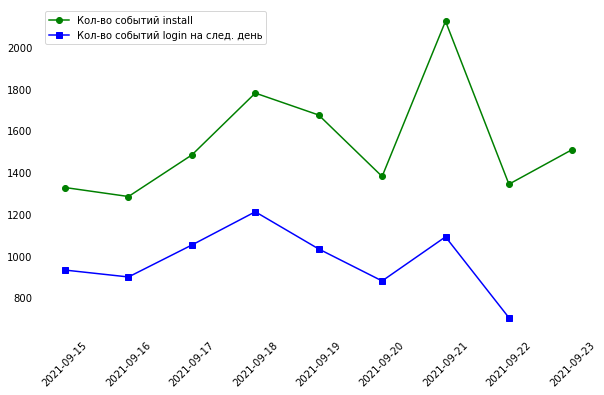

In [7]:
plot_lines([cohorts.index,cohorts.index],[cohorts['num_installs'],cohorts['next_day_logins']],
          ['Кол-во событий install','Кол-во событий login на след. день'],['g-','b-'],['o','s']);

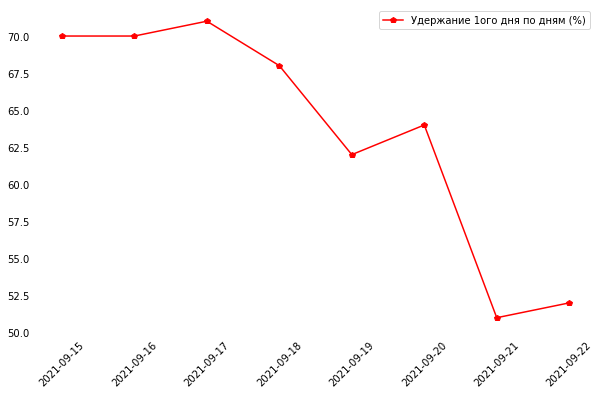

In [8]:
plot_lines([cohorts.index],[cohorts['d1_retention (%)']],['Удержание 1ого дня по дням (%)'],
          ['r-'],['p']);

In [9]:
first_period = round(sum(cohorts[:4]['next_day_logins'])/sum(cohorts[:4]['num_installs'])*100)
second_period = round(sum(cohorts[4:-1]['next_day_logins'])/sum(cohorts[4:-1]['num_installs'])*100)
print(f'Удержание первого дня за период с 15 по 18 сентября: {first_period}%')
print(f'Удержание первого дня за период с 19 по 22 сентября: {second_period}%')

Удержание первого дня за период с 15 по 18 сентября: 70%
Удержание первого дня за период с 19 по 22 сентября: 57%


В абсолютных цифрах 70 > 57 и получается, что удержание первого дня для интервала с 15 по 18 сентября выше чем с 19 по 22 сентября. Но можно ли утверждать это с уверенностью?  

Предположим, что это было проведено А/B тестирование и необходимо выяснить изменится ли удержание первого дня у контрольной группы. Нулевая гипотеза - удержание первого дня не изменится, альтернативная - удержание первого дня изменится. Уровень уверенности 95%. Посчитаем p-значение для контрольной и альтернативной групп. Если оно ниже 0.05, то альтернативная теория подтверждена, если выше - нулевая гипотеза подтверждена. В нашем случае p-значение ниже нуля будет означать значимый результат.

In [10]:
z_stat, pval = proportions_ztest(count=[4094,3708], nobs=[5873,6520])
round(pval,3)

0.0

P-значение стремится к 0, результат значимый. Мы можем с уверенностью утверждать, что удержание первого дня для интервала с 19 по 22 сентября изменится по сравнению с удержанием первого дня за отрезок с 15 по 18 сентября. В данном случае эта метрика уменьшилась.

## Task 3

В файле "Lightmap. Тестовое задание №3.csv" построчно приведены записи транзакций, совершенных в приложении когортой пользователей. В столбце event_timestamp указано время транзакции (unix timestamp UTC), в столбце registration_timestamp - дата регистрации пользователя, в столбце inapp_size - размер соответствующего платежа (сумма $).

Требуется построить кривую накопительной суммы платежей когорты по дням с момента регистрации (один день - одна точка на кривой). На основании полученных данных построить и отобразить в виде другой кривой на том же графике прогноз значений накопительной суммы для дней жизни с 90 по 180.

In [11]:
task3 = pd.read_csv('lightmap3.csv')

In [12]:
task3.head()

,event_timestamp,registration_timestamp,inapp_size
0,1611154038,1610971359,5
1,1611759898,1610972522,3
2,1611057594,1610974545,5
3,1611562555,1610976251,3
4,1611082290,1610976461,3


In [13]:
task3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11577 entries, 0 to 11576
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   event_timestamp         11577 non-null  int64
 1   registration_timestamp  11577 non-null  int64
 2   inapp_size              11577 non-null  int64
dtypes: int64(3)
memory usage: 271.5 KB


Данные в виде 3 колонок и 11577 строк. Пропусков нет. Колонку со временем события трансформируем, чтобы были читаемы даты.

In [14]:
task3 = unix_to_date(task3,['event_timestamp','registration_timestamp'])
task3.head()

,event_timestamp,registration_timestamp,inapp_size
0,2021-01-20 14:47:18,2021-01-18 12:02:39,5
1,2021-01-27 15:04:58,2021-01-18 12:22:02,3
2,2021-01-19 11:59:54,2021-01-18 12:55:45,5
3,2021-01-25 08:15:55,2021-01-18 13:24:11,3
4,2021-01-19 18:51:30,2021-01-18 13:27:41,3


Добавим колонку с количеством дней между регистрацией пользователя и транзакцией.

In [15]:
task3['delta'] = (task3['event_timestamp']-task3['registration_timestamp']).dt.days
task3.head()

,event_timestamp,registration_timestamp,inapp_size,delta
0,2021-01-20 14:47:18,2021-01-18 12:02:39,5,2
1,2021-01-27 15:04:58,2021-01-18 12:22:02,3,9
2,2021-01-19 11:59:54,2021-01-18 12:55:45,5,0
3,2021-01-25 08:15:55,2021-01-18 13:24:11,3,6
4,2021-01-19 18:51:30,2021-01-18 13:27:41,3,1


Сгруппирем данные по дням, прошедшим между регистрацией и транзакцией, посчитаем общую и накопительные суммы по дня для когорты пользователей.

In [16]:
revenues = task3.groupby('delta')['inapp_size'].agg(['sum'])
revenues.columns = ['revenue_day']
revenues['cum_revenue'] = revenues['revenue_day'].cumsum()
revenues.head()

,revenue_day,cum_revenue
delta,,
0,22612,22612
1,5256,27868
2,3519,31387
3,3644,35031
4,2613,37644


Колонка с накопительной суммой платежей когорты по дням с момента регистрации ('cum_revenue') будет отображена на графике. Также на графике будет отбрежно два прогноза на дни с 90 по 180: основанный на ариметической средней и экспоненциальном сглаживании (взвешенное среднее, где последние данные имеют более высокий вес).

In [17]:
# простая арифметическая средняя

# средняя сумма платежей в день за известные дни
avg_per_day = round(revenues['revenue_day'].mean())

# предполагаемые суммы платежей на дни с 90 по 180
revenues_90_180 = [avg_per_day]*90

# предполагаемые накопительные суммы платежей на дни с 90 по 180
cum_revenues_90_180 = revenues_90_180 
cum_revenues_90_180[0] = revenues['cum_revenue'][89] + avg_per_day
cum_revenues_90_180 = np.cumsum(cum_revenues_90_180)

In [18]:
# экспоненциальное сглаживание

# подготовка модели для расчетов
model = SimpleExpSmoothing(np.asarray(revenues['revenue_day'])).fit()

# предполагаемые суммы платежей с 90 по 180 день по дням
exp_rev_90_180 = model.forecast(90)

# накопительная сумма платежей на 90й день
exp_cum_rev_90_180 = exp_rev_90_180
exp_cum_rev_90_180[0] = revenues['cum_revenue'][89] + exp_rev_90_180[0]

# накопительные суммы платежей с 90 по 180 день
exp_cum_rev_90_180 = exp_cum_rev_90_180.cumsum()

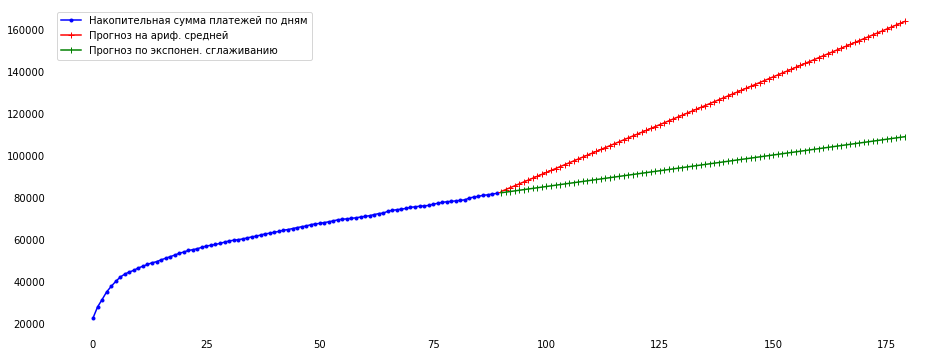

In [19]:
plot_lines([revenues.index,range(90,180),range(90,180)],
          [revenues['cum_revenue'],cum_revenues_90_180,exp_cum_rev_90_180],
          ['Накопительная сумма платежей по дням','Прогноз на ариф. средней','Прогноз по экспонен. сглаживанию'],
          ['b-','r-','g-'],['.','+','|'],(16,6),False);

Прогноз, сделанный с помощью экспоненциального сгаживания, выглядит более реалистично, т.к. в какой то момент в будущем накопительная сумма платежей от пользователей перестанет увеличиваться, а график перейдет в горизонтальную линию.